In [12]:
%pylab inline
import warnings
import numpy as np
import matplotlib.pyplot as plt

import rayopt as ro

# ignore matplotlib and numpy warning each other
warnings.simplefilter("ignore", FutureWarning)
# ignore floating point exceptions
np.seterr(divide="ignore", invalid="ignore")
np.set_printoptions(precision=4)

Populating the interactive namespace from numpy and matplotlib


In [16]:
s = ro.system_from_yaml("""
object:
  angle_deg: 5
  pupil:
    radius: 1
elements:
- {}
- {distance: 1, material: 1.5, roc: 5}
- {distance: .2, material: 1.0}
- {}
""")
s.update()
print(s)

System: 
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 5°
 Pupil:
   Pupil Distance: 1
   Radius: 1
Image:
 Radius: inf
 Update Radius: True
 Pupil:
   Pupil Distance: -0.133333
   Update Radius: True
   Radius: inf
Stop: 1
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf        inf              None     nan     nan     nan
 1 S          1          5        inf                 -   1.500   1.500     inf
 2 S        0.2        inf        inf                 -   1.000   1.000     inf
 3 S          0        inf        inf              None     nan     nan     nan



In [17]:
print([e.radius for e in s])
s.paraxial.resize()
print([e.radius for e in s])
s.resize_convex()
print([e.radius for e in s])

[inf, inf, inf, inf]
[inf, 1.0, 0.99834675448806665, 0.99834675448806665]
[inf, 1.0, 1.0, 0.99834675448806665]


In [18]:
s.paraxial.focal_length

array([-10.,  10.])

System: 
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 5°
 Pupil:
   Pupil Distance: 1
   Radius: 1
Image:
 Radius: 0.998
 Update Radius: True
 Pupil:
   Pupil Distance: -0.133333
   Update Radius: True
   Radius: 1
Stop: 1
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf        inf              None     nan     nan     nan
 1 S          1          5          2                 -   1.500   1.500     inf
 2 S        0.2        inf          2                 -   1.000   1.000     inf
 3 S     9.7839        inf     1.9967              None     nan     nan     nan

lagrange: -0.087601
track length: 0.2
object, image height: [ 0.0876  0.0117]
petzval radius: 15
front, back focal length (from PP): [-10.  10.]
entry, exit pupil height: [ 1.  1.]
entry, exit pupil distance: [-0.     -0.1333]
front, back focal distance: [-10.       9.8667]
front, back principal distance: [ 0.     -0.1333]
fro

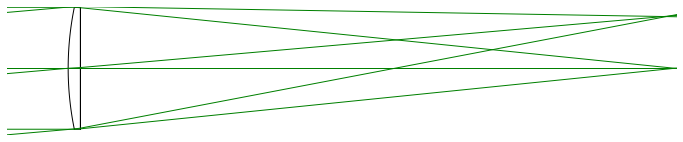

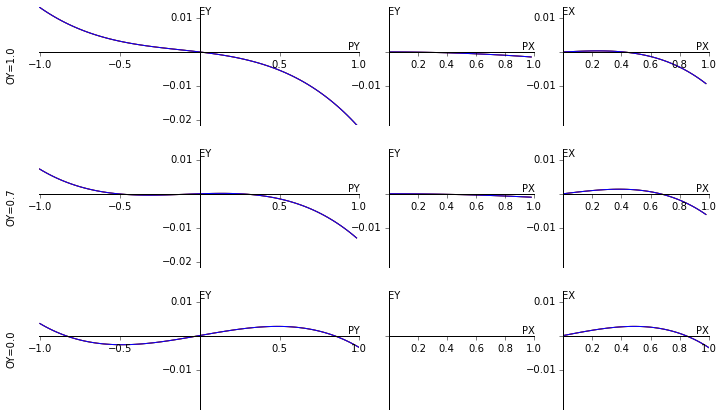

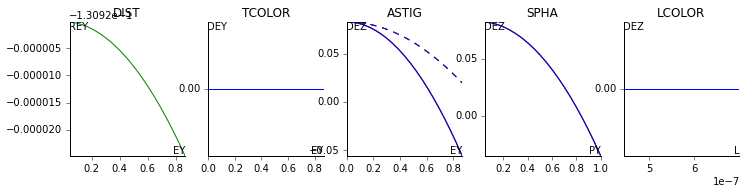

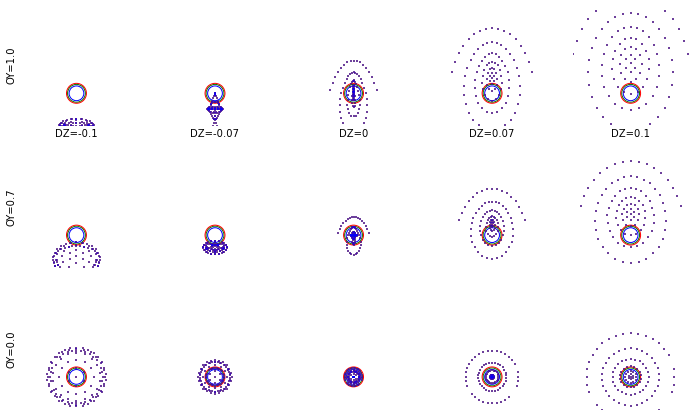

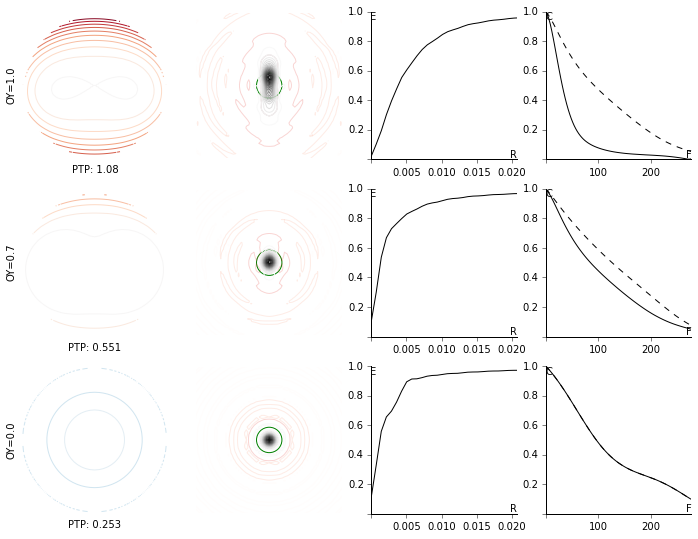

In [19]:
ro.Analysis(s)

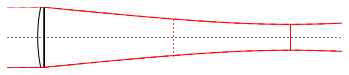

In [5]:
s.object.pupil.radius = .2
q = ro.GaussianTrace(s)
fig, ax = plt.subplots()
s.plot(ax)
q.plot(ax, color="red", scale=50)
s.object.pupil.radius = 10.

In [6]:
p = ro.PolyTrace(s, kmax=3)
print(p)

maximum order: 3
wavelength: 587.56

s1 : -1.14778e-04
s2 :  1.66231e-03
s3 : -4.92157e-01
s4 : -3.30574e-01
s5 :  3.70370e-01
m1 : -3.42432e-08
m2 :  1.53085e-06
m3 :  1.25683e-06
m4 : -3.77088e-04
m5 : -1.92520e-04
m6 : -3.15912e-05
m7 :  2.71552e-03
m8 : -5.32514e-03
m9 :  4.52957e-03
m10: -6.98997e-01
m11:  1.16326e-01
m12: -1.54321e-01

s1100: spherical aberration                 : -1.14778e-04
t1100: sagittal coma                        : -1.66231e-03
s2010: field curvature                      : -8.22730e-01
t2010: distortion                           : -3.70370e-01
s3001: meridional coma                      : -3.37981e-03
t3001: field curvature                      : -9.84313e-01
s4200: spherical aberration                 : -3.42432e-08
t4200: circular coma                        : -2.74019e-07
s5110: sagittal oblique spherical aberration: -1.92520e-04
t5110: meridional elliptical coma           : -8.04066e-03
s6101: circular coma                        : -2.51367e-06
t6101: 

In [7]:
print("\n".join(p.print_trace()))

S
  n  i  j  k            1            2            3
  0  0  0  0  1.00000e+00  9.86667e-01  8.27934e-03
  1  1  0  0  0.00000e+00  6.45926e-05 -1.14778e-04
  2  0  1  0  0.00000e+00 -7.40741e-03 -8.22730e-01
  3  0  0  1  0.00000e+00 -1.18519e-04 -3.37981e-03
  4  2  0  0  0.00000e+00  1.65333e-08 -3.42432e-08
  5  1  1  0  0.00000e+00  3.48642e-05 -1.92520e-04
  6  1  0  1  0.00000e+00  1.85284e-06 -2.51367e-06
  7  0  2  0  0.00000e+00  3.08642e-03  1.16326e-01
  8  0  1  1  0.00000e+00  3.03577e-20  9.05914e-03
  9  0  0  2  0.00000e+00 -7.90123e-07 -3.15912e-05

T
  n  i  j  k            1            2            3
  0  0  0  0  0.00000e+00  1.33333e+00  9.91721e+01
  1  1  0  0  1.00000e-02  3.22963e-03 -1.66231e-03
  2  0  1  0  0.00000e+00 -3.70370e-01 -3.70370e-01
  3  0  0  1  0.00000e+00 -5.92593e-03 -9.84313e-01
  4  2  0  0  1.00000e-06  8.26667e-07 -2.74019e-07
  5  1  1  0  0.00000e+00  1.74321e-03 -8.04066e-03
  6  1  0  1  2.00000e-04  9.26420e-05 -1.84568e-04
  7  0 

In [8]:
y = np.atleast_2d([10., 0, 0])
-s[1].surface_sag(y), p.stvwof[1, -1].view(p.Simplex)(*y.T[0]**2, [0.], [0.])

(array([ 1.01]), array([ 1.01]))

In [27]:
lib = ro.Library.one()
for g in lib.session.query(
    ro.library.Glass).filter(
    ro.library.Glass.name.contains("BK7")):
    print(g.name, g.catalog.name, g.catalog.source)

J-BK7 HIKARI zemax
E-BK7 HIKARI zemax
BK7G18 Rad_Hard zemax
N-BK7_MOLD RPO zemax
N-BK7 SCHOTT zemax
N-BK7HT SCHOTT zemax
P-BK7 SCHOTT zemax
BK7G18 SCHOTT zemax
N-BK7HTi SCHOTT zemax
BK7 SCHOTT zemax
BK7HT SCHOTT zemax
UBK7 SCHOTT zemax
BK7 Sumita zemax
J-BK7 HIKARI oslo
BK7 Obsolete oslo
E-BK7 Obsolete oslo
O_BK7-O Obsolete oslo
UBK7 Obsolete oslo
K_E-BK7 Obsolete oslo
U_BK7 Obsolete oslo
N-BK7 SCHOTT oslo
N-BK7HT SCHOTT oslo
N-BK7HTI SCHOTT oslo
P-BK7 SCHOTT oslo
BK7G18 schott_radhard oslo
BK7G25 schott_radhard oslo
K-BK7 SUMITA oslo
BK7/SCHOTT glass rii
BK7/OHARA glass rii
BK7/HIKARI glass rii
BK7/CDGM glass rii
BK7/HOYA glass rii
BK7/SUMITA glass rii
BK7/LZOS glass rii
SCHOTT-BK/N-BK7 glass rii
SCHOTT-BK/N-BK7HT glass rii
SCHOTT-BK/P-BK7 glass rii
SCHOTT-inquiry/BK7G18 glass rii
HIKARI-BK/E-BK7 glass rii
SUMITA-BK/K-BK7 glass rii
BK7_matching_liquid/Cargille other rii
glass/BK7 3d rii


In [41]:
s[1].material = lib.get("glass", "BK7/SCHOTT", source="rii")
for i in 0, 2, 3:
    s[i].material = ro.air
print(s)

System: 
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 5°
 Pupil:
   Pupil Distance: 10
   Refractive Index: 1.00028
   Radius: 10
Image:
 Radius: 9.87
 Update Radius: True
 Pupil:
   Pupil Distance: -96.0232
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 10
Stop: 1
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf        inf         basic/air   1.000   1.000   89.30
 1 S         10         50         20  glass/BK7/SCHOTT   1.517   1.517   64.17
 2 S          2        inf         20         basic/air   1.000   1.000   89.30
 3 S     94.704        inf     19.733         basic/air   1.000   1.000   89.30



System: 
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 5°
 Pupil:
   Pupil Distance: 10
   Refractive Index: 1.00028
   Radius: 10
Image:
 Radius: 9.87
 Update Radius: True
 Pupil:
   Pupil Distance: -96.0232
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 10
Stop: 1
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf        inf         basic/air   1.000   1.000   89.30
 1 S         10         50         20  glass/BK7/SCHOTT   1.517   1.517   64.17
 2 S          2        inf         20         basic/air   1.000   1.000   89.30
 3 S     94.704        inf     19.733         basic/air   1.000   1.000   89.30

lagrange: -0.87625
track length: 2
object, image height: [ 0.876  8.412]
petzval radius: 146.87
front, back focal length (from PP): [-96.828  96.828]
entry, exit pupil height: [ 10.  10.]
entry, exit pupil distance: [-0.    -1.319]
front, back focal distance: [-96.828 

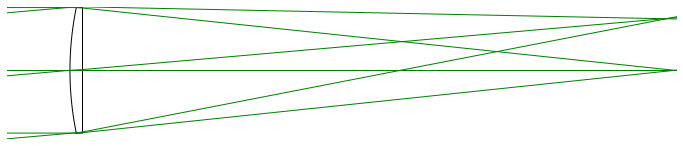

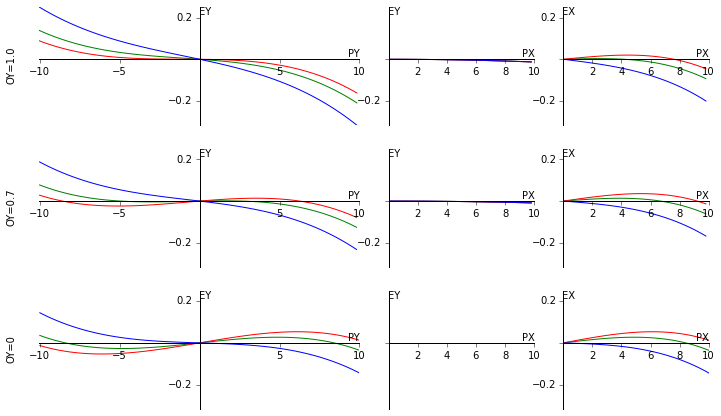

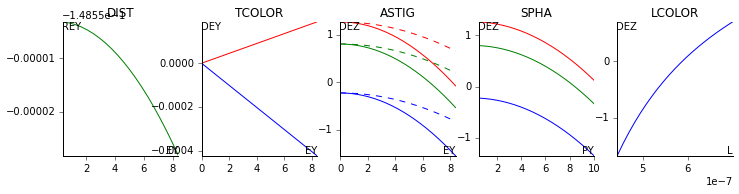

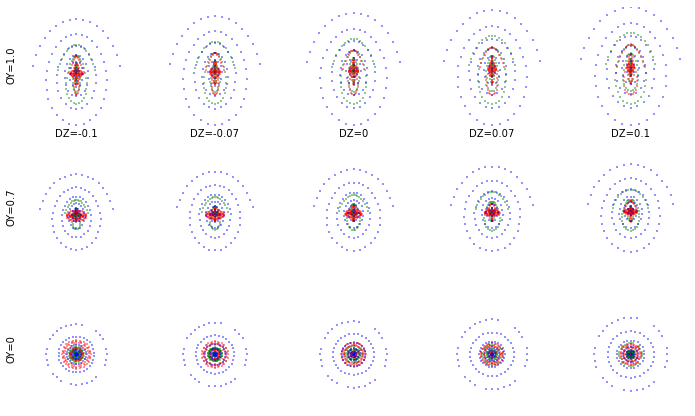

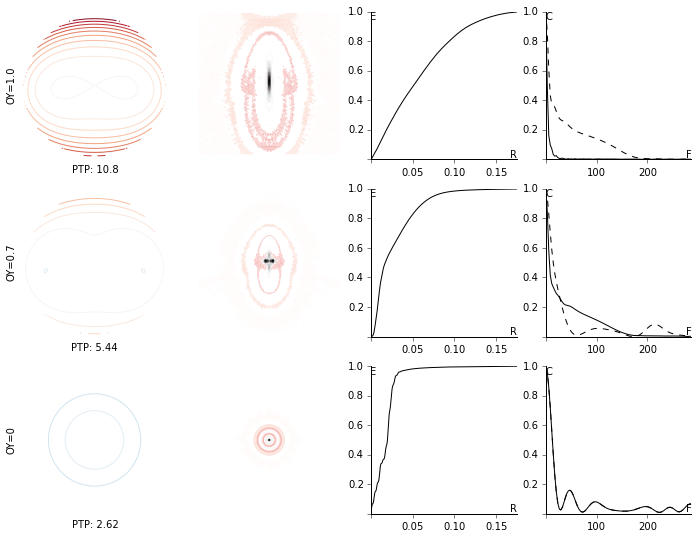

In [42]:
s.object.angle = np.deg2rad(5)
s.fields = 0, .7, 1.
ro.Analysis(s)

In [46]:
dir(ro)

['AbbeMaterial',
 'Analysis',
 'CoefficientsMaterial',
 'Conjugate',
 'Element',
 'FiniteConjugate',
 'FnoPupil',
 'FullTrace',
 'GaussianTrace',
 'GeometricTrace',
 'InfiniteConjugate',
 'Interface',
 'Library',
 'Material',
 'ModelMaterial',
 'NaPupil',
 'ParaxialTrace',
 'PolyState',
 'PolyTrace',
 'Pupil',
 'RadiusPupil',
 'SlopePupil',
 'Spheroid',
 'System',
 'Trace',
 'TransformMixin',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_transformations',
 'aberration_orders',
 'absolute_import',
 'air',
 'analysis',
 'cachend',
 'conjugates',
 'division',
 'elements',
 'formats',
 'fraunhofer',
 'gaussian_trace',
 'geometric_trace',
 'len_to_system',
 'library',
 'material',
 'mirror',
 'name_mixin',
 'oslo',
 'paraxial_trace',
 'poly_trace',
 'print_function',
 'pupils',
 'raytrace',
 'rii',
 'simplex',
 'simplex_accel',
 'special_sums',
 'system',
 'system_from_json',
 'system_from_text',
 'system_fr

In [47]:
ro.cachend.PolarCacheND??